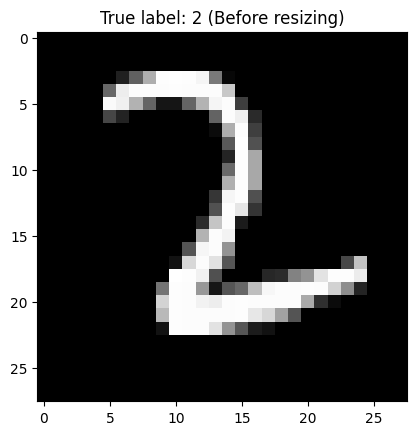

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
The prediction is correct! Predicted: 2
Latency of the classification process: 0.297744 seconds


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("D:/MCW/Assignment-4 RESNET/TensorRT/lightweight_resnet_mnist (3).h5")  # Replace with the correct model path

# Load MNIST data
(_, _), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the image to (28, 28, 1)
x_test = x_test / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Pick a random image
random_index = np.random.randint(0, x_test.shape[0])
random_image = x_test[random_index]
true_label = y_test[random_index]

# Plot the image before resizing
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f"True label: {true_label} (Before resizing)")
plt.show()

# Resize and convert to 3 channels
random_image_resized = tf.image.resize(random_image, (112, 112))
random_image_resized = tf.image.grayscale_to_rgb(random_image_resized)

# Measure the latency of the prediction
start_time = time.time()
prediction = model.predict(np.expand_dims(random_image_resized, axis=0))
end_time = time.time()

# Calculate latency
latency = end_time - start_time

predicted_label = np.argmax(prediction)

# Print whether the prediction is correct or not and the latency
if true_label == predicted_label:
    print(f"The prediction is correct! Predicted: {predicted_label}")
else:
    print(f"The prediction is incorrect. Predicted: {predicted_label}, True label: {true_label}")

print(f"Latency of the classification process: {latency:.6f} seconds")